In [12]:
import sklearn as skl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report

In [13]:
%store -r data

In [14]:
print(data.columns)
print(data.shape)
print(data.info())

Index(['category', 'main_category', 'currency', 'deadline', 'goal', 'launched',
       'pledged', 'state', 'backers', 'country', 'usd pledged',
       'usd_pledged_real', 'usd_goal_real', 'continent', 'days_launched',
       'launched_month'],
      dtype='object')
(5000, 16)
<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 372978 to 378660
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   category          5000 non-null   object        
 1   main_category     5000 non-null   object        
 2   currency          5000 non-null   object        
 3   deadline          5000 non-null   datetime64[ns]
 4   goal              5000 non-null   float64       
 5   launched          5000 non-null   datetime64[ns]
 6   pledged           5000 non-null   float64       
 7   state             5000 non-null   int64         
 8   backers           5000 non-null   int64         
 9   country        

In [15]:
data_xg = data.copy()
data_xg.drop(['category','main_category','currency','deadline','goal','launched','country','continent','usd_goal_real','days_launched','launched_month'] ,axis=1,inplace=True)
data_xg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 372978 to 378660
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pledged           5000 non-null   float64
 1   state             5000 non-null   int64  
 2   backers           5000 non-null   int64  
 3   usd pledged       5000 non-null   float64
 4   usd_pledged_real  5000 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 234.4 KB


In [16]:
from sklearn.model_selection import train_test_split

def grafico_barras(data,atr,title,xlabel,ylabel):
    incidents_count = data[atr].value_counts()
    sns.set(style='darkgrid')
    sns.barplot(x=incidents_count.index, y=incidents_count.values)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()

X = data_xg.drop(['state'],axis=1)
y = data_xg['state'].to_frame()
random = 2021
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=random)

def graficos_pontos(data):
    sns.pairplot(data)

In [17]:
print("The shape of X %s. X_train has shape %s while X_test has shape %s" %(X.shape, X_train.shape, X_test.shape))
print("The shape of y %s. y_train has shape %s while y_test has shape %s" %(y.shape, y_train.shape, y_test.shape))

The shape of X (5000, 4). X_train has shape (3500, 4) while X_test has shape (1500, 4)
The shape of y (5000, 1). y_train has shape (3500, 1) while y_test has shape (1500, 1)


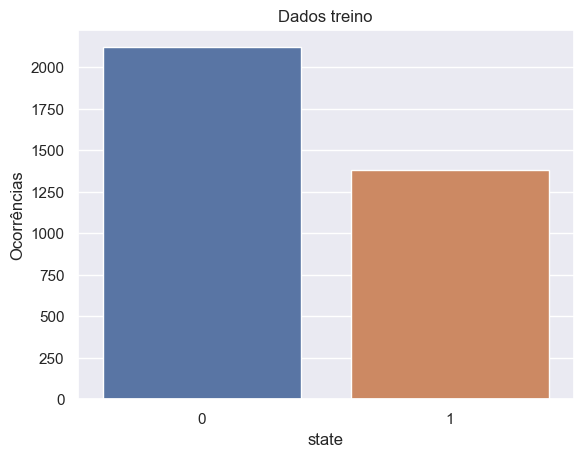

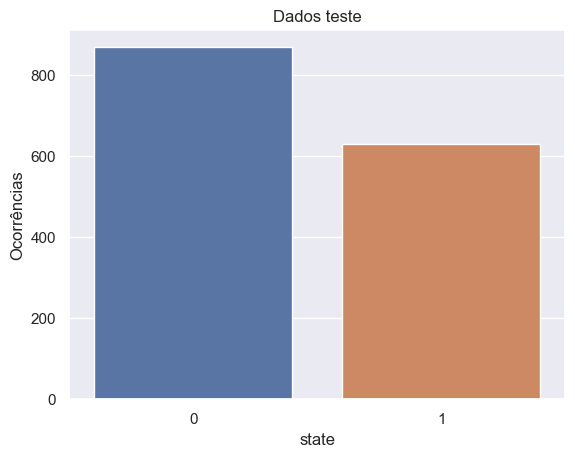

c:\Users\mikef\miniconda3\envs\DAA\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


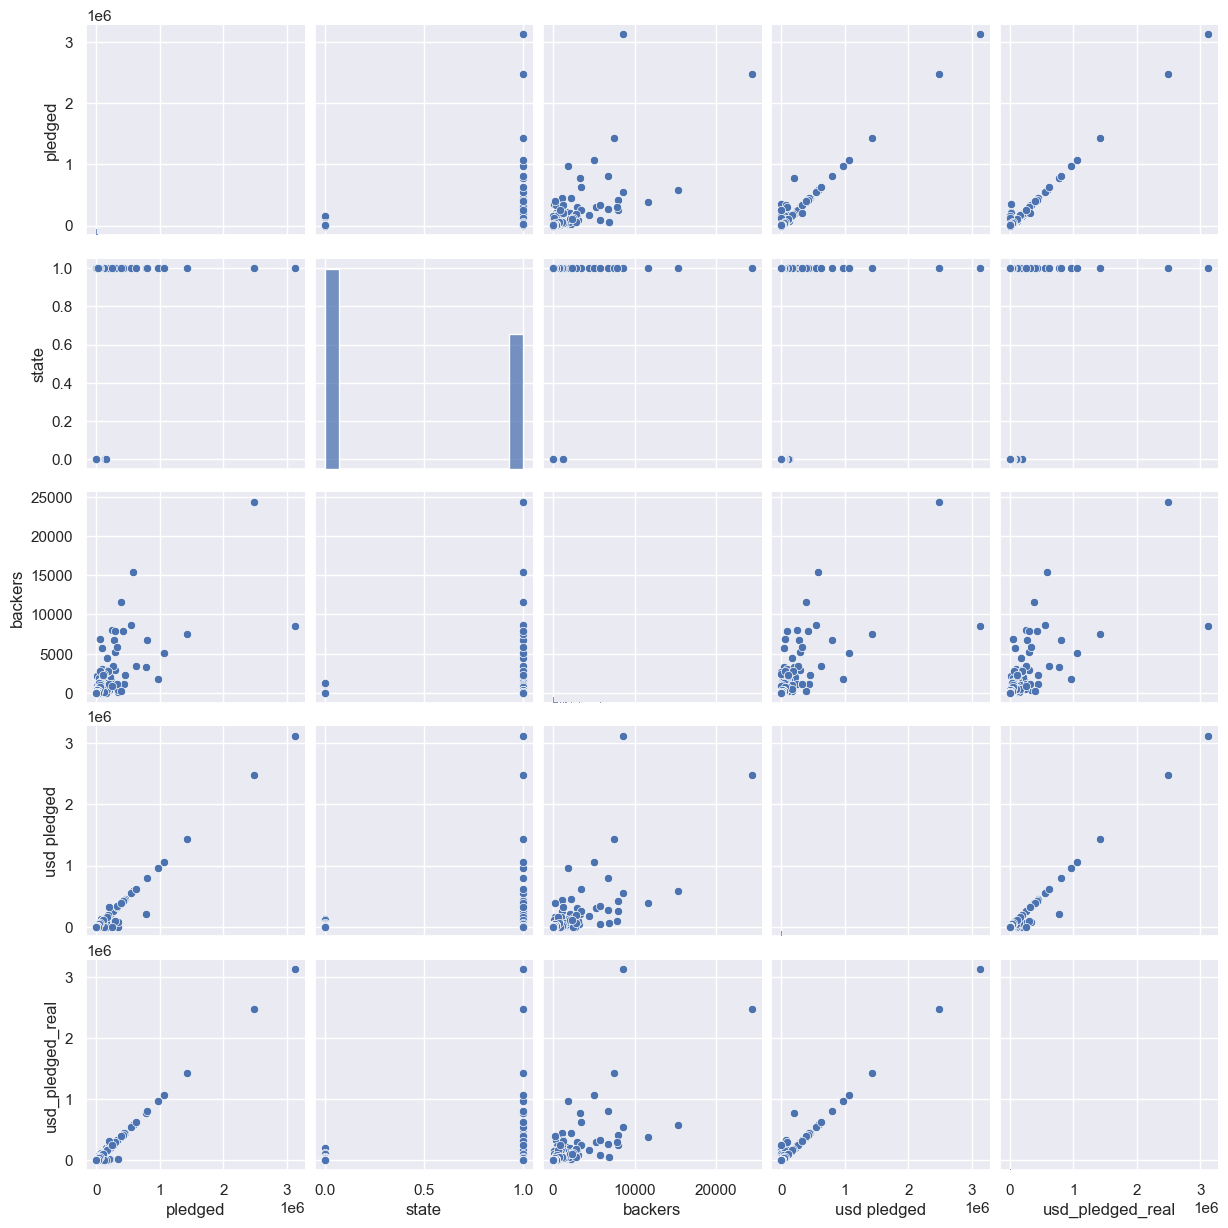

In [18]:
grafico_barras(y_train,'state','Dados treino','state','Ocorrências')
grafico_barras(y_test,'state','Dados teste','state','Ocorrências')
graficos_pontos(data_xg)

In [19]:
xgb_model = XGBClassifier(max_depth = 1, objective = 'reg:squarederror')

In [20]:
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='reg:squarederror', predictor=None, ...)

In [21]:
xgb_score = xgb_model.score(X_test,y_test)

In [22]:
print("Accuracy: %.2f%%" % (xgb_score * 100))

Accuracy: 83.40%


In [23]:
xgb_predictions = xgb_model.predict(X_test)

In [24]:
print(classification_report(y_test,xgb_predictions))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85       869
           1       0.76      0.87      0.82       631

    accuracy                           0.83      1500
   macro avg       0.83      0.84      0.83      1500
weighted avg       0.84      0.83      0.83      1500

